In [1]:
import sys
import numpy as np

from matplotlib import pyplot as plt

from linear_theory import f_of_a, D_of_a

sys.path.append('/global/homes/s/sfschen/Python/velocileptors')
from velocileptors.LPT.lpt_rsd_fftw import LPT_RSD

In [2]:
# Load initial power spectrum
ki, pi = np.loadtxt('Pk_Planck15_Table4.txt',unpack=True)

(0.0, 0.5)

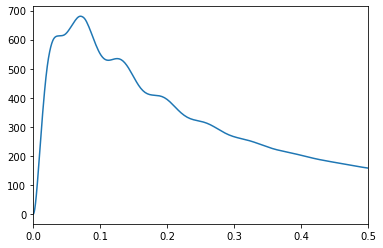

In [3]:
plt.plot(ki, ki * pi)
plt.xlim(0,0.5)

In [4]:
# Shape Fit Parameters
def shapefit_factor(kvec, m, a = 0.6, kp = 0.03, n = 0):
    
    return m/a * np.tanh(a * np.log(kvec/kp) ) + n * np.log(kvec/kp)

In [5]:
# Set up parameters: (fsigma8, apar, aperp, m)
from compute_pell_tables_template import kvec, compute_pell_tables
cpars = [0.5, 1.08, 0.95, -0.02]

bpars = [1, 0.5, -2, 0,\
         3, -5, 15, 0,\
         1000, -2000, 0]

fsigma8, apar, aperp, m = cpars

(0.0, 0.5)

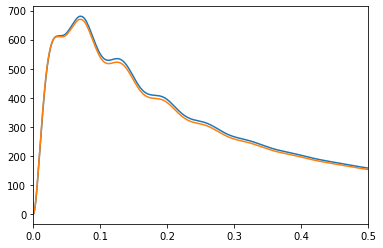

In [6]:
fac = np.exp( shapefit_factor(ki, m = m) )

plt.plot(ki, ki * pi)
plt.plot(ki, ki * fac * pi)

plt.xlim(0,0.5)

In [41]:
# Make PT object
z =0.61

Dz = D_of_a(1./(1+z),OmegaM=0.31)
sigma8 = 0.82 * Dz
fz = fsigma8 / sigma8

modPT = LPT_RSD(ki, Dz**2 * fac * pi, kIR=0.2,\
                cutoff=10, extrap_min = -4, extrap_max = 3, N = 2000, threads=1, jn=5)
modPT.make_pltable(fz, kv=kvec, apar=apar, aperp=aperp, ngauss=3)

0

In [42]:
p0t, p2t, p4t = compute_pell_tables(cpars,zeff=z)

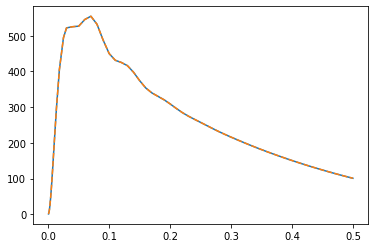

In [43]:
# Compare component by component

plt.plot(kvec, kvec * p0t[:,0])
plt.plot(kvec, kvec * modPT.p0ktable[:,0], '--')

In [44]:
# Test the emulator

In [45]:
from emulator_pells import Emulator_Pells

In [46]:
emu = Emulator_Pells('emu/shapefit_z_%.2f_Om_0.31_pkells.json'%(z),order=4)

In [47]:
# Compare emulator vs. direct calculation:
kt, p0t, p2t, p4t = modPT.combine_bias_terms_pkell(bpars)
kvec, p0, p2, p4 = emu(cpars, bpars)

(0.0, 3000.0)

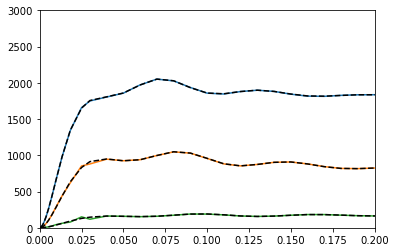

In [48]:
plt.plot(kvec, kvec * p0)
plt.plot(kvec, kvec * p2)
plt.plot(kvec, kvec * p4)

plt.plot(kt, kt * p0t, 'k--')
plt.plot(kt, kt * p2t, 'k--')
plt.plot(kt, kt * p4t, 'k--')

plt.xlim(0,0.2)
plt.ylim(0,3000)

(-0.01, 0.01)

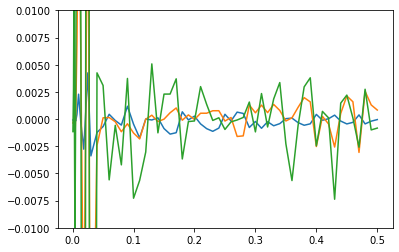

In [49]:
plt.plot(kt, p0/p0t - 1)
plt.plot(kt, p2/p2t - 1)
plt.plot(kt, p4/p4t - 1)


plt.ylim(-0.01, 0.01)